In [1]:
import torch
import pandas as pd
import numpy as np
import transformers
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from tqdm import tqdm

from transformers import BertTokenizer, AutoModel

from Preprocessing import preprocess_text

d:\GitHub\Jurnal-Clustering\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('data/data_sinta_translated.csv')
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

df.head(500)


,jid,desc,title,date,journal,data_cleaned,word,jid_umum,translated
0,1,Belakangan ini Lembaga PAUD berbondong-bondong...,Kemampuan Bahasa Inggris Awal pada Periode Lin...,2023-10-05,JURNAL OBSESI: JURNAL PENDIDIKAN ANAK USIA DINI,kemampuan bahasa inggris awal pada periode lin...,151,1,Early English language skills in the linguisti...
1,1,The assessment process carried out in schools ...,Strengthening Early Childhood Learning Outcome...,2022-06-09,JURNAL OBSESI: JURNAL PENDIDIKAN ANAK USIA DINI,strengthening early childhood learning outcome...,177,1,strengthening early childhood learning outcome...
2,1,Kewajiban guru PAUD untuk memberikan layanan b...,Eksplorasi Deskriptif tentang Layanan Bimbinga...,2023-06-07,JURNAL OBSESI: JURNAL PENDIDIKAN ANAK USIA DINI,eksplorasi deskriptif tentang layanan bimbinga...,151,1,Descriptive exploration of guidance and counse...
3,1,Pandemi Covid-19 merambah sejak awal tahun 202...,Perspektif Orang Tua terhadap Pelaksanaan Les ...,2021-06-02,JURNAL OBSESI: JURNAL PENDIDIKAN ANAK USIA DINI,perspektif orang tua terhadap pelaksanaan les ...,172,1,Parents' perspective on the implementation of ...
4,1,Dalam upaya mencapai Sustainable Development G...,Strategi Pencegahan dan Penanganan Stunting Mu...,2023-12-26,JURNAL OBSESI: JURNAL PENDIDIKAN ANAK USIA DINI,strategi pencegahan dan penanganan stunting mu...,159,1,strategies for preventing and handling multidi...
...,...,...,...,...,...,...,...,...,...
495,1,Anak usia 4-6 masa emas dimana masa sangat pen...,Pengembangan Multimedia Interaktif Tema Alam S...,2020-10-16,JURNAL OBSESI: JURNAL PENDIDIKAN ANAK USIA DINI,pengembangan multimedia interaktif tema alam s...,151,1,development of interactive multimedia with the...
496,1,Tujuan penelitian ini yaitu mendeskripsikan ba...,Peran Kepala Lembaga Taman Kanak-Kanak dalam P...,2023-10-15,JURNAL OBSESI: JURNAL PENDIDIKAN ANAK USIA DINI,peran kepala lembaga taman kanakkanak dalam pe...,146,1,The role of the head of a kindergarten institu...
497,1,Evaluasi membuahkan pengetahuan yang relevan d...,Evaluasi CIPP Penerapan Permendikbud 137 dan 1...,2022-02-09,JURNAL OBSESI: JURNAL PENDIDIKAN ANAK USIA DINI,evaluasi cipp penerapan permendikbud dan tah...,143,1,CIPP evaluation of the implementation of Perme...
498,1,The impact of Large-Scale Social Restrictions ...,The Phenomenon of Changes in Student Behavior ...,2023-06-18,JURNAL OBSESI: JURNAL PENDIDIKAN ANAK USIA DINI,the phenomenon of changes in student behavior ...,174,1,the phenomenon of changes in student behavior ...


In [3]:
df[df.translated.isna()]

,jid,desc,title,date,journal,data_cleaned,word,jid_umum,translated


In [4]:
title_unik = list(df.journal.unique())
title_unik

['JURNAL OBSESI: JURNAL PENDIDIKAN ANAK USIA DINI',
 'JURNAL CENDEKIA : JURNAL PENDIDIKAN MATEMATIKA',
 'INTERNATIONAL JOURNAL OF ELEMENTARY EDUCATION',
 'JURNAL BISNIS DAN AKUNTANSI',
 'JURNAL AKUNTANSI DAN KEUANGAN',
 'JURNAL PENDIDIKAN TEKNIK MESIN UNDIKSHA',
 'INTERNATIONAL JOURNAL OF BASIC AND APPLIED SCIENCE',
 'JURNAL KESEHATAN MASYARAKAT',
 'GADJAH MADA INTERNATIONAL JOURNAL OF BUSINESS',
 'JURNAL KESEHATAN ANDALAS',
 'E-JOURNAL OF CULTURAL STUDIES',
 'E-JURNAL AKUNTANSI']

In [5]:
df.translated[0]

"Early English language skills in the linguistic period of early childhood. Recently, preschool institutions have flocked to provide English language learning for children in the linguistic period. This research aims to determine children's initial abilities in listening and pronouncing English vocabulary in the linguistic period. This research is a descriptive study using a quantitative approach. The population of this study includes children in kindergarten, then the researcher carried out sampling using a saturated sampling technique with the number of children. This research was carried out in September March in collaboration with class teachers. Data collection activities for this research were carried out through observation using a participatory model. The description of the results of this research is divided into two, namely the ability to listen to initial English vocabulary, namely in the beginning to develop category, then the ability to pronounce initial English vocabulary

In [6]:
df['jid_umum'] = df['jid']
df['jid_umum'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [7]:
journal_id = {title_unik[i] : i + 1 for i in range(len(title_unik))}
df['jid'] = df.journal.apply(lambda x : journal_id[x])
df

,jid,desc,title,date,journal,data_cleaned,word,jid_umum,translated
0,1,Belakangan ini Lembaga PAUD berbondong-bondong...,Kemampuan Bahasa Inggris Awal pada Periode Lin...,2023-10-05,JURNAL OBSESI: JURNAL PENDIDIKAN ANAK USIA DINI,kemampuan bahasa inggris awal pada periode lin...,151,1,Early English language skills in the linguisti...
1,1,The assessment process carried out in schools ...,Strengthening Early Childhood Learning Outcome...,2022-06-09,JURNAL OBSESI: JURNAL PENDIDIKAN ANAK USIA DINI,strengthening early childhood learning outcome...,177,1,strengthening early childhood learning outcome...
2,1,Kewajiban guru PAUD untuk memberikan layanan b...,Eksplorasi Deskriptif tentang Layanan Bimbinga...,2023-06-07,JURNAL OBSESI: JURNAL PENDIDIKAN ANAK USIA DINI,eksplorasi deskriptif tentang layanan bimbinga...,151,1,Descriptive exploration of guidance and counse...
3,1,Pandemi Covid-19 merambah sejak awal tahun 202...,Perspektif Orang Tua terhadap Pelaksanaan Les ...,2021-06-02,JURNAL OBSESI: JURNAL PENDIDIKAN ANAK USIA DINI,perspektif orang tua terhadap pelaksanaan les ...,172,1,Parents' perspective on the implementation of ...
4,1,Dalam upaya mencapai Sustainable Development G...,Strategi Pencegahan dan Penanganan Stunting Mu...,2023-12-26,JURNAL OBSESI: JURNAL PENDIDIKAN ANAK USIA DINI,strategi pencegahan dan penanganan stunting mu...,159,1,strategies for preventing and handling multidi...
...,...,...,...,...,...,...,...,...,...
8663,12,The purpose of this study to examine the effec...,"PENGARUH KINERJA KEUANGAN, DANA ALOKASI UMUM D...",2017-05-15,E-JURNAL AKUNTANSI,pengaruh kinerja keuangan dana alokasi umum da...,157,12,pengaruh kinerja keuangan dana alokasi umum da...
8664,12,The level of understanding of accounting to be...,"PENGARUH KECERDASAN EMOSIONAL, KECERDASAN INTE...",2017-08-06,E-JURNAL AKUNTANSI,pengaruh kecerdasan emosional kecerdasan intel...,179,12,pengaruh kecerdasan emosional kecerdasan intel...
8665,12,The purpose of this study was to examine the i...,"PENGARUH UKURAN PERUSAHAAN, KOMPLEKSITAS OPERA...",2017-02-15,E-JURNAL AKUNTANSI,pengaruh ukuran perusahaan kompleksitas operas...,133,12,pengaruh ukuran perusahaan kompleksitas operas...
8666,12,The purpose of this study is to determine the ...,KINERJA DINAS PARIWISATA BALI BERDASARKAN KONS...,2016-11-10,E-JURNAL AKUNTANSI,kinerja dinas pariwisata bali berdasarkan kons...,147,12,kinerja dinas pariwisata bali berdasarkan kons...


In [8]:
'''
1 'JURNAL OBSESI: JURNAL PENDIDIKAN ANAK USIA DINI', [4, 5, 7, 8, 9, 10, 11, 12]
2 'JURNAL CENDEKIA : JURNAL PENDIDIKAN MATEMATIKA', [4, 5, 7, 8, 9, 10, 11, 12]
3 'INTERNATIONAL JOURNAL OF ELEMENTARY EDUCATION', [4, 5, 7, 8, 9, 10, 11, 12]
4 'JURNAL BISNIS DAN AKUNTANSI', [1, 2, 3, 6, 8, 10, 11]
5 'JURNAL AKUNTANSI DAN KEUANGAN', [1, 2, 3, 6, 8, 10, 11]
6 'JURNAL PENDIDIKAN TEKNIK MESIN UNDIKSHA', [4, 5, 7, 8, 9, 10, 11, 12]
7 'INTERNATIONAL JOURNAL OF BASIC AND APPLIED SCIENCE', [4, 5, 8, 9, 10, 12]
8 'JURNAL KESEHATAN MASYARAKAT', [1, 2, 3, 4, 5, 6, 7, 9, 11, 12]
9 'GADJAH MADA INTERNATIONAL JOURNAL OF BUSINESS', [1, 2, 3, 6, 8, 10, 11]
10 'JURNAL KESEHATAN ANDALAS', [1, 2, 3, 4, 5, 6, 7, 9, 11, 12]
11 'E-JOURNAL OF CULTURAL STUDIES', [1, 2, 3, 4, 5, 6, 8, 9, 10, 12]
12 'E-JURNAL AKUNTANSI', [1, 2, 3, 6, 8, 10, 11]
 '''


jurnal_id = 1
# jurnal_id = 2
# jurnal_id = 3
# jurnal_id = 4
# jurnal_id = 5
# jurnal_id = 6
# jurnal_id = 7
# jurnal_id = 8
# jurnal_id = 9
# jurnal_id = 10
# jurnal_id = 11
# jurnal_id = 12  


data_jid = df[df['jid']==jurnal_id]
data = data_jid['translated']
data

0       Early English language skills in the linguisti...
1       strengthening early childhood learning outcome...
2       Descriptive exploration of guidance and counse...
3       Parents' perspective on the implementation of ...
4       strategies for preventing and handling multidi...
                              ...                        
1464    the achievement of early childhood development...
1465    colour ball based on microcontroller as a educ...
1466    development of digital technology, science sto...
1467    The influence of technical guidance for specia...
1468    managing english young learners classroom acti...
Name: translated, Length: 1469, dtype: object

In [9]:
class BertClassifier(nn.Module):
    def __init__(self, num_labels):
        super(BertClassifier, self).__init__()
        self.bert = AutoModel.from_pretrained('bert-base-multilingual-cased')
        self.classifier = nn.Sequential(
            nn.Linear(self.bert.config.hidden_size, 300),
            nn.ReLU(),
            nn.Linear(300, 100),
            nn.ReLU(),
            nn.Linear(100, 50),
            nn.ReLU(),
            nn.Linear(50, num_labels)
        )

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        x = outputs['last_hidden_state'][:, 0, :]
        x = self.classifier(x)
        return x

: 

In [10]:
import torch
from transformers import BertTokenizer, AutoModel
from sklearn.cluster import KMeans
import numpy as np

# Load pre-trained IndoBERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
model = BertClassifier(12)
model.load_state_dict(torch.load('model/finetuned_model_sinta_translated.pt'))


In [ ]:
def tokenize_data(texts, tokenizer, max_length=128):
    input_ids = []
    attention_masks = []

    for text in texts:
        encoded_dict = tokenizer.encode_plus(
                            text,
                            add_special_tokens=True,
                            max_length=max_length,
                            pad_to_max_length=True,
                            return_attention_mask=True,
                            return_tensors='pt'
                       )
        input_ids.append(encoded_dict['input_ids'])
        attention_masks.append(encoded_dict['attention_mask'])

    input_ids = torch.cat(input_ids, dim=0)
    attention_masks = torch.cat(attention_masks, dim=0)

    return input_ids, attention_masks

# Tokenisasi data
input_ids, attention_masks = tokenize_data(data, tokenizer)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


c:\Users\LENOVO\GitHub\Jurnal-Clustering\.venv\lib\site-packages\transformers\tokenization_utils_base.py:2688: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
from torch.utils.data import Dataset, DataLoader

# Buat dataloader
class ArticleDataset(Dataset):
    def __init__(self, input_ids, attention_masks):
        self.input_ids = input_ids
        self.attention_masks = attention_masks

    def __getitem__(self, idx):
        return {
            'input_ids': self.input_ids[idx],
            'attention_mask': self.attention_masks[idx]
        }

    def __len__(self):
        return len(self.input_ids)

dataset = ArticleDataset(input_ids, attention_masks)

In [ ]:
# Membuat dataloader
batch_size = 32
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

In [ ]:
import torch

device = 'cpu'
if torch.cuda.is_available() :
    device = 'cuda'

model.to(device)

# Set model ke mode evaluasi (non-training)
model.eval()

# Embedding
embeddings = []

with torch.no_grad():
    for batch in dataloader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        # print(outputs)
        # last_hidden_states = outputs.last_hidden_state
        embeddings.append(outputs.cpu().numpy())

embeddings = np.concatenate(embeddings, axis=0)

In [ ]:
from sklearn.decomposition import PCA

# Mengubah array embeddings menjadi matriks dua dimensi
X = embeddings.reshape(embeddings.shape[0], -1)

pca = PCA(n_components=2, random_state=0)
X = pca.fit_transform(X)

In [ ]:
# Perform KMeans clustering
num_clusters = 1
kmeans = KMeans(n_clusters=num_clusters, random_state=0, max_iter=1000)
kmeans.fit(X)

# Assign each journal to its cluster
cluster_labels = kmeans.labels_

In [ ]:
# import joblib

# # Simpan model KMeans
# filename = f"{jurnal_id}_kmeans.pkl"
# joblib.dump(kmeans, filename)
# print("Model KMeans telah disimpan dengan nama:", filename)


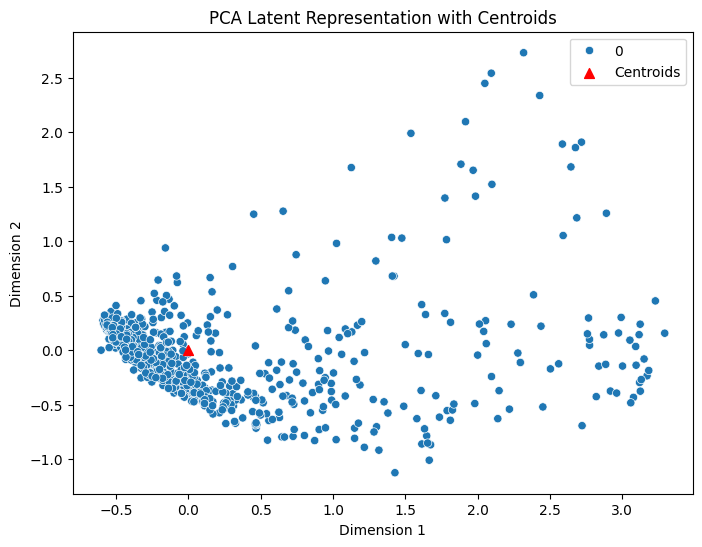

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

def plot_vector_distribution(vector_representation, kmeans_labels):
    # pca = PCA(n_components=2, random_state=0)
    # pca_result = pca.fit_transform(vector_representation)

    # df_pca = pd.DataFrame(pca_result, columns=['Dimension 1', 'Dimension 2'])
    df_pca = pd.DataFrame(vector_representation, columns=['Dimension 1', 'Dimension 2'])
    df_pca['Cluster Label'] = kmeans_labels

    cluster_palette = sns.color_palette('tab10', n_colors=len(np.unique(kmeans_labels)))
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Cluster Label', data=df_pca, palette=cluster_palette)
    
    # Menambahkan centroid ke dalam plot
    centroids = []
    for label in np.unique(kmeans_labels):
        # centroid = np.mean(pca_result[kmeans_labels == label], axis=0)
        centroid = np.mean(vector_representation[kmeans_labels == label], axis=0)
        centroids.append(centroid)
    centroids = np.array(centroids)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='^', c='red', s=50, label='Centroids')
    
    plt.title('PCA Latent Representation with Centroids')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.legend()
    plt.show()

plot_vector_distribution(X, cluster_labels)


In [ ]:
# Mendapatkan koordinat pusat cluster
centroid = kmeans.cluster_centers_

# Menghitung jarak antara setiap titik data dengan centroid
jarak_ke_centroid = np.sqrt(np.sum((X - centroid)**2, axis=1))

# Menentukan batas jarak yang dianggap sebagai "outscoop"
outscoop_threshold = np.mean(jarak_ke_centroid) + 2 * np.std(jarak_ke_centroid)

# Memisahkan data yang masih masuk dalam "scoop" dan "outscoop"
scoop_data = X[jarak_ke_centroid <= outscoop_threshold]
outscoop_data = X[jarak_ke_centroid > outscoop_threshold]

print(outscoop_threshold)

1.8639428615570068


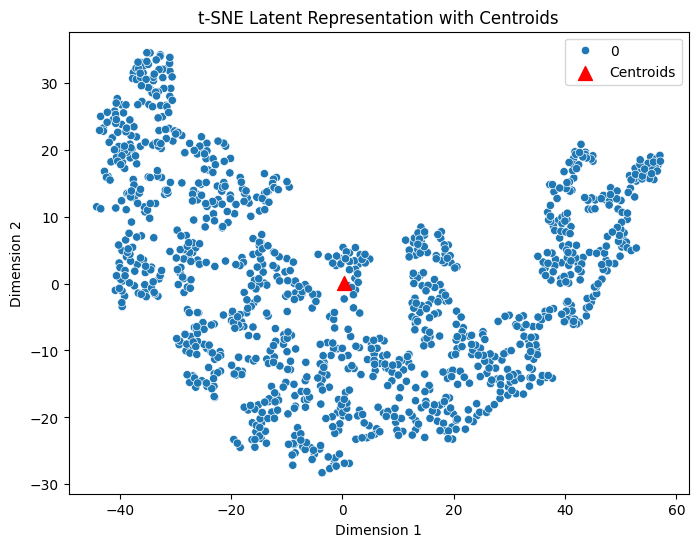

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import numpy as np

def plot_vector_distribution(vector_matrix, kmeans_labels):
    tsne = TSNE(random_state=0)
    tsne_result = tsne.fit_transform(vector_matrix)

    df_tsne = pd.DataFrame(tsne_result, columns=['Dimension 1', 'Dimension 2'])
    df_tsne['Cluster Label'] = kmeans_labels

    cluster_palette = sns.color_palette('tab10', n_colors=len(np.unique(kmeans_labels)))
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Cluster Label', data=df_tsne, palette=cluster_palette)
    
    # Menambahkan centroid ke dalam plot
    centroids = []
    for label in np.unique(kmeans_labels):
        centroid = np.mean(tsne_result[kmeans_labels == label], axis=0)
        centroids.append(centroid)
    centroids = np.array(centroids)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='^', c='red', s=100, label='Centroids')
    
    plt.title('t-SNE Latent Representation with Centroids')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.legend()
    plt.show()

plot_vector_distribution(embeddings.reshape(embeddings.shape[0], -1), kmeans.labels_)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12416\3035859482.py:16: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Scoop Label', style='Scoop Label', data=df_pca, palette=cluster_palette, markers=['o', 'X'], legend='full')


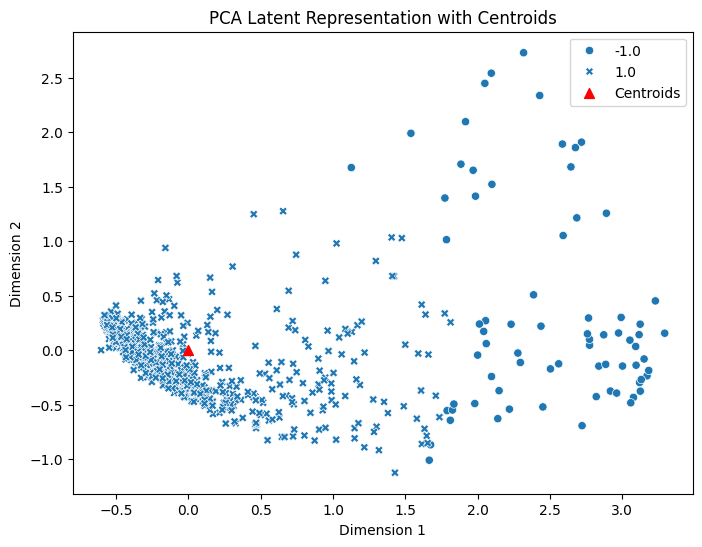

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

def plot_vector_distribution(vector_representation, kmeans_labels, scoop_labels, new_data_pca=None):
    pca = PCA(n_components=2, random_state=0)
    pca_result = pca.fit_transform(vector_representation)

    df_pca = pd.DataFrame(pca_result, columns=['Dimension 1', 'Dimension 2'])
    df_pca['Scoop Label'] = scoop_labels

    cluster_palette = sns.color_palette('tab10', n_colors=len(np.unique(kmeans_labels)))
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Scoop Label', style='Scoop Label', data=df_pca, palette=cluster_palette, markers=['o', 'X'], legend='full')
    
    # Menambahkan centroid ke dalam plot
    centroids = []
    for label in np.unique(kmeans_labels):
        centroid = np.mean(pca_result[kmeans_labels == label], axis=0)
        centroids.append(centroid)
    centroids = np.array(centroids)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='^', c='red', s=50, label='Centroids')
    
    # Menampilkan posisi data PCA baru
    if new_data_pca is not None:
        plt.scatter(new_data_pca[:, 0], new_data_pca[:, 1], marker='s', c='black', s=50, label='New Data PCA')
    
    plt.title('PCA Latent Representation with Centroids')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.legend()
    plt.show()

    return df_pca

# Menentukan label untuk scoop dan outscoop
scoop_labels = np.ones(len(X))
scoop_labels[jarak_ke_centroid > outscoop_threshold] = -1

df_pca = plot_vector_distribution(X, kmeans.labels_, scoop_labels)

In [ ]:
import os

journal_type = 'finetuned_sinta_translated'

# Assuming 'jurnal_id' is a variable containing the directory name
file_path = f"./src/{journal_type}/{jurnal_id}"

if not os.path.exists(file_path):
  os.mkdir(file_path)


In [ ]:
import numpy as np
import joblib

# Simpan model KMeans
filename_kmeans = f"{file_path}/{jurnal_id}_kmeans.pkl"
joblib.dump(kmeans, filename_kmeans)
print("Model KMeans telah disimpan dengan nama:", filename_kmeans)

# Simpan threshold
np.save(f"{file_path}/{jurnal_id}_threshold.npy", outscoop_threshold)
print("Threshold telah disimpan.")

# Simpan data sebaran PCA
np.save(f"{file_path}/{jurnal_id}_pca_data.npy", X)
print("Data sebaran PCA telah disimpan.")

# Simpan data sebaran multibert
np.save(f"{file_path}/{jurnal_id}_bert_data.npy", embeddings.reshape(embeddings.shape[0], -1))
print("Data sebaran PCA telah disimpan.")


Model KMeans telah disimpan dengan nama: ./src/finetuned_sinta_translated/12/12_kmeans.pkl
Threshold telah disimpan.
Data sebaran PCA telah disimpan.
Data sebaran PCA telah disimpan.


In [ ]:
import pandas as pd

# Membuat DataFrame dengan data teks dan label scoop
df_res = pd.DataFrame({'Data': data,
                   'Label': scoop_labels})

# Memisahkan data dalam scoop dan outscoop
inScoop_df = df_res[df_res['Label'] == 1]
outScoop_df = df_res[df_res['Label'] == -1]

df_res.to_csv(f'{file_path}/{jurnal_id}_data_jurnal.csv')
inScoop_df.to_csv(f'{file_path}/{jurnal_id}_inscoop_data_jurnal.csv')
outScoop_df.to_csv(f'{file_path}/{jurnal_id}_outscoop_data_jurnal.csv')

print("Data dalam scoop:")
print(inScoop_df)

print("\nData outscoop:")
print(outScoop_df)


Data dalam scoop:
                                                   Data  Label
7521  profitabilitas dan corporate social responsibi...    1.0
7522  information technology is a system that helps ...    1.0
7523  pengaruh kepemilikan manajerial dan kepemilika...    1.0
7524  pengaruh kualitas aktiva produktif car leverag...    1.0
7525  pengaruh profesionalisme kepribadian hardiness...    1.0
...                                                 ...    ...
8661  pengaruh diversifikasi operasi leverage dan ke...    1.0
8662  pengaruh perceived usefulness dan perceived ea...    1.0
8663  pengaruh kinerja keuangan dana alokasi umum da...    1.0
8666  kinerja dinas pariwisata bali berdasarkan kons...    1.0
8667  Services in the financial sector in rural area...    1.0

[1073 rows x 2 columns]

Data outscoop:
                                                   Data  Label
7528  pengaruh ukuran perusahaan profitabilitas tipe...   -1.0
7563  pengaruh return on asset struktur modal price ...   -

In [ ]:
# outScoop_df['Data'][1165]

In [ ]:
# inScoop_df['Data'][109]

### Predict

In [ ]:
from sklearn.decomposition import PCA

def fit_new_data_to_pca(new_data, pca):
    # Transformasi data baru ke ruang PCA yang sama dengan data lama
    new_data_pca = pca.transform(new_data.reshape(1, -1))

    return new_data_pca

In [ ]:
def predict_scoop(text_data, tokenizer, model, kmeans_model, scoop_threshold, pca_data):
    # Preprocess title and abstract
    processed_text = preprocess_text(text_data)

    # Tokenize new data
    encoded_dict = tokenizer.encode_plus(
        processed_text,
        add_special_tokens=True,
        max_length=128,
        pad_to_max_length=True,
        return_attention_mask=True,
        return_tensors='pt'
    )

    # Calculate embedding for new data
    input_ids = encoded_dict['input_ids'].to(device)
    attention_mask = encoded_dict['attention_mask'].to(device)

    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
        new_embedding = outputs.cpu().numpy().reshape(1, -1)

    new_data_pca = fit_new_data_to_pca(new_embedding, pca)
    print("new data :", new_data_pca, "cluster center :", kmeans_model.cluster_centers_)

    # Calculate distance to centroid
    distance_to_centroid = np.sqrt(np.sum((new_data_pca - kmeans_model.cluster_centers_)**2, axis=1))
    print("Distance", distance_to_centroid, "threshold :", scoop_threshold)
    print("inscoop", distance_to_centroid <= scoop_threshold)

    # Determine if new data is in scoop or outscoop
    if distance_to_centroid <= scoop_threshold:
        prediction = "in scoop"
    else:
        prediction = "out scoop"

    return prediction, new_data_pca

In [ ]:
judul_baru = 'PAE AMDFWIE SKDFJWEI LADFK WLA DKFA IWEF MADSFLL EW IALFAS DKFEIW ALFAS'
abstrak_baru ='dsalfkejlk aslkdf ael akdf alie dlf ajefo wa jdkafl kwpa jdfj alie ajdlfk ajweil pq lsfj alwe alfj jkeaji dlf kea lt [a fpds pof  af kas l iq lkdsa jifel akt li il af laifelakai alf kalei altk alif wlak t m, aal it lakfldiafaelka df aieal'

text_data = judul_baru + abstrak_baru

# text_data = "halo test ini bukan bagian dari cluster"

# Predict scoop for new data
scoop_prediction, new_embedding = predict_scoop(text_data, tokenizer, model, kmeans, outscoop_threshold, X)
print("Prediksi scoop untuk data baru:", scoop_prediction)

c:\Users\LENOVO\GitHub\Jurnal-Clustering\.venv\lib\site-packages\transformers\tokenization_utils_base.py:2688: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


new data : [[2.1846063 5.3801637]] cluster center : [[3.3226863e-07 2.1639812e-07]]
Distance [5.8067775] threshold : 1.8639428615570068
inscoop [False]
Prediksi scoop untuk data baru: out scoop


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12416\3035859482.py:16: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Scoop Label', style='Scoop Label', data=df_pca, palette=cluster_palette, markers=['o', 'X'], legend='full')


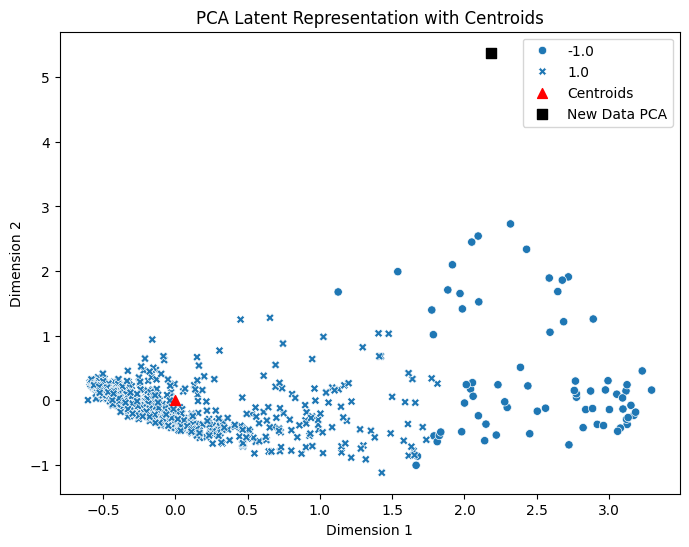

In [ ]:
# Menentukan label untuk scoop dan outscoop
scoop_labels = np.ones(len(X))
scoop_labels[jarak_ke_centroid > outscoop_threshold] = -1

df_pca = plot_vector_distribution(X, kmeans.labels_, scoop_labels, new_embedding)